# Tutorial 1 Solution
# K-means Clustering

## K-means clustering on the Iris dataset

In [1]:
# importing the libraries fpr arrays, plot and dataframes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')

# Load 4 columns of the Iris data values
x = dataset.iloc[:, [1, 2, 3, 4]].values

# Show first five records
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# import KMeans library for clustering
from sklearn.cluster import KMeans

# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

# n_initial, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x)

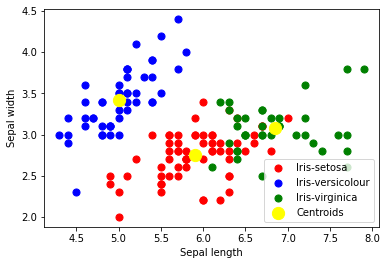

In [3]:
# Visualising the clusters using scatter() method
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

## Practice
### Can you check the clusters for Petal length and Petal width?


### -------------------------------------------------------------------------------------- ###

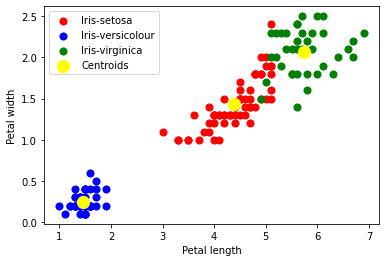

In [4]:
# Visualising the clusters using scatter() method

plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

#plt.scatter(x, y, c=t, cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7) 

# How to decide number of clutsers for data using Elbow method?
### Cluster Sum of Squares
One measurement is <b>Within Cluster Sum of Squares (WCSS)</b>, which measures the squared average distance of all the points within a cluster to the cluster centroid. To calculate WCSS, you first find the Euclidean distance between a given point and the centroid to which it is assigned.

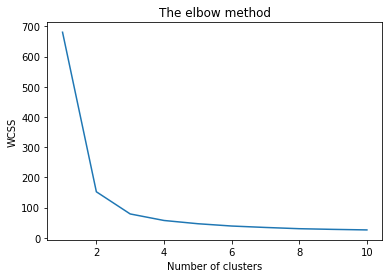

In [5]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)  # Initialise an object kmeans by calling 
                                                                                    # an object KMeans()
    kmeans.fit(x)                                                                   # Training the model by calling fit() method
    wcss.append(kmeans.inertia_)                                                    # Store kmeans.inertia_ in the array wcss
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

# Calculate Silhouette Score based on two and three clusters.

In [6]:
# import silhouette score from sklearn library
from sklearn.metrics import silhouette_score

# Display the silhouette score values
print(f'Silhouette Score(n = 3): {silhouette_score(x, y_kmeans)}')

Silhouette Score(n = 3): 0.5525919445499757


It is clear from the figure that why it is called <b>'The elbow method'</b> from the above graph, the optimum clusters is where the elbow occurs. This is when the <b>within cluster sum of squares (WCSS) </b> doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

# Task 1

Assume you own a grocery mall and have access to basic information on your customers via membership cards, such as Customer ID, age, gender, annual income, and spending score. Based on your specified criteria, such as customer behavior and purchasing information, you can assign the customer a spending score. In order to reward or promote your consumers, you as the owner would like to understand their behavior. So that your marketing team plan the strategy accordingly. The dataset is provided on Moodle.

## How to use Machine Learning (kMeans clustering) algorithm to help the owner of the grocery mall using  Age and Annual Income (k$)

In [7]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('MallCustomers.csv')

# Load 4 columns of the Iris data values
x = dataset.iloc[:, [1, 2]].values

# Show first five records
dataset.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,Male
1,2,21,15,81,Male
2,3,20,16,6,Female
3,4,23,16,77,Female
4,5,31,17,40,Female


In [8]:
# import KMeans library for clustering
from sklearn.cluster import KMeans

# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 0)

# n_initint, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2
 2 2 2 1 2 1 2 1 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 3 1 1 3 1 1 1 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


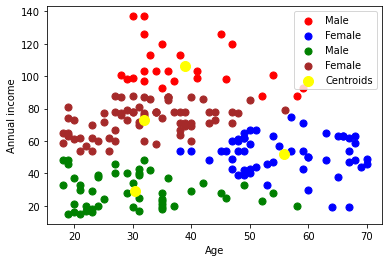

In [9]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Male')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Female')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Male')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'brown', label = 'Female')
# For two clusters, remove the second last two python statements from the above four python statements

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1:2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Age')
plt.ylabel('Annual income')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend() 

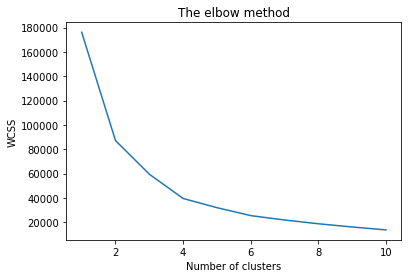

In [10]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [11]:
# import silhouette score from sklearn library
from sklearn.metrics import silhouette_score

# Display the silhouette score values
print(f'Silhouette Score(n = 4): {silhouette_score(x, y_kmeans)}')

Silhouette Score(n = 4): 0.43295184273333076


## Reference:
<p>- https://www.kaggle.com/muhammadiqbaldublin/uber-analysis/edit</p>